<a href="https://colab.research.google.com/github/poomshift/PromptAlchemist_Playground-2.5-colab/blob/main/Playground_2_5_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

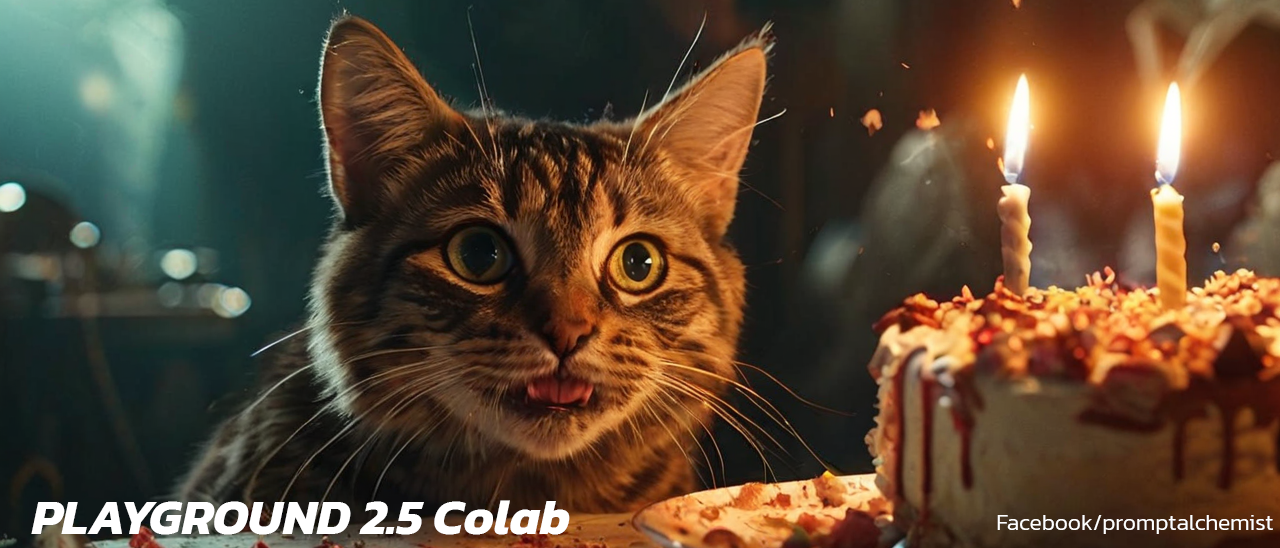

Colab Notebook นี้สร้างเพื่อใช้งาน Playground v2.5 – 1024px Aesthetic Model

Playground v2.5 เป็น Diffusers model พัฒนาโดย Playground เน้นความสวยงามโดยเฉพาะ

อ่านเพิ่มเติมที่ https://huggingface.co/playgroundai/playground-v2.5-1024px-aesthetic

ติดตามอัพเดทเกี่ยวกับเทคโนโลยี Ai ที่ [Facebook/promptalchemist](https://facebook.com/PromptAlchemist)

Colab สำหรับ Stable Diffusion WebUI [>>คลิก<<](https://colab.research.google.com/github/poomshift/PromptAlchemist_SD_Webui_Colab/blob/main/PromptAlchemist_SD_Webui_Colab.ipynb#scrollTo=1F-zYI2-Uo0a)

In [ ]:
#@markdown # 1. ติดตั้ง Dependencies ก่อน
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

%env TF_CPP_MIN_LOG_LEVEL=1
!wget https://github.com/camenduru/gperftools/releases/download/v1.0/libtcmalloc_minimal.so.4 -O /content/libtcmalloc_minimal.so.4
%env LD_PRELOAD=/content/libtcmalloc_minimal.so.4

!pip install git+https://github.com/huggingface/diffusers.git
!pip install transformers accelerate safetensors gradio

clear_output()
inf('\u2714 Done','success', '50px')

In [ ]:
#@markdown # 2. Run โปรแกรม
import gradio as gr
from diffusers import DiffusionPipeline
import torch

from IPython.display import clear_output
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 1000})'''))

# Load the model (adjust the paths if needed)
pipe = DiffusionPipeline.from_pretrained(
    "playgroundai/playground-v2.5-1024px-aesthetic",
    torch_dtype=torch.float16,
    variant="fp16",
).to("cuda")

# Optional: Use DPM++ 2M Karras scheduler
from diffusers import EDMDPMSolverMultistepScheduler
pipe.scheduler = EDMDPMSolverMultistepScheduler()
clear_output()

def generate_image(prompt, num_inference_steps=50, guidance_scale=3, width=512, height=512):
    image = pipe(
        prompt=prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        width=width,
        height=height
    ).images[0]
    return image

# Gradio interface
iface = gr.Interface(
    fn=generate_image,
    inputs=[
        gr.Textbox(lines=2, placeholder="Enter your prompt here..."),
        gr.Slider(0, 100, value=50, label="Inference Steps"),
        gr.Slider(0, 10, value=3, label="Guidance Scale"),
        gr.Number(value=1024, label="Width"),
        gr.Number(value=1024, label="Height"),
    ],
    outputs=gr.Image(),  # Using gr.Image() for better display

title="Playground 2.5 Colab | facebook.com/PromptAlchemist",
description="ขนาดภาพที่แนะนำ 1024x1024 | 720x1280 | 1280x720"
)

iface.launch()